# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [7]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')
appl=yf.Ticker('AAPL')
amzn=yf.Ticker('AMZN')

In [8]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)
appl_df=appl.history(start=start, end=end)
amzn_df=amzn.history(start=start, end=end)

# 2. Pre-processing

In [9]:
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 
appl_returns=100 * appl_df[['Close']].pct_change().dropna() 
amzn_returns=100 * amzn_df[['Close']].pct_change().dropna() 

In [10]:
g_vol = g_returns**2
ms_vol = ms_returns**2
appl_vol=appl_returns**2
amzn_vol=amzn_returns**2

In [11]:
df_all = pd.concat([g_vol, ms_vol, appl_vol, amzn_vol], axis=1)

df_all.columns = ['Google', 'Microsoft', 'Apple', 'Amazon']

df_all.head()

,Google,Microsoft,Apple,Amazon
Date,,,,
2018-01-03 00:00:00-05:00,2.693917,0.216585,0.000303,1.632086
2018-01-04 00:00:00-05:00,0.131138,0.774659,0.215735,0.200347
2018-01-05 00:00:00-05:00,2.123159,1.537124,1.296245,2.612269
2018-01-08 00:00:00-05:00,0.182599,0.010416,0.137955,2.080714
2018-01-09 00:00:00-05:00,0.003774,0.004616,0.000131,0.218623


### Decomposition

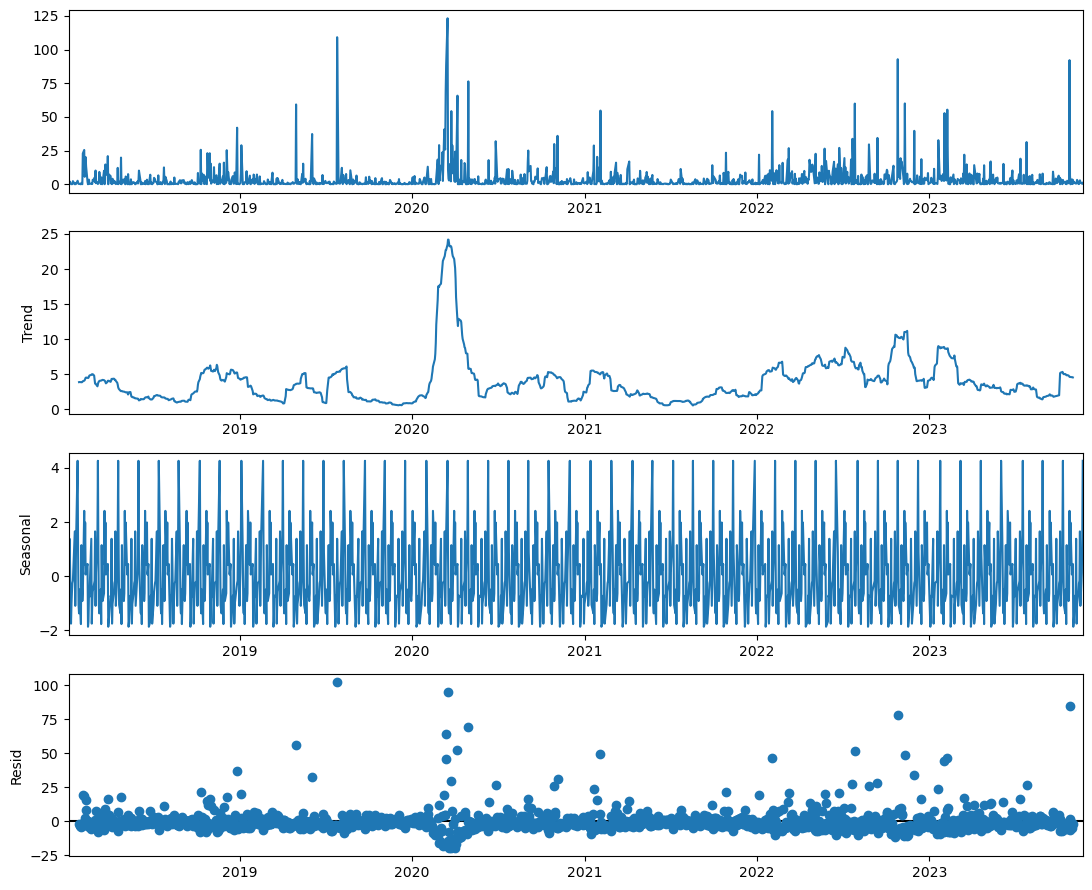

In [12]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

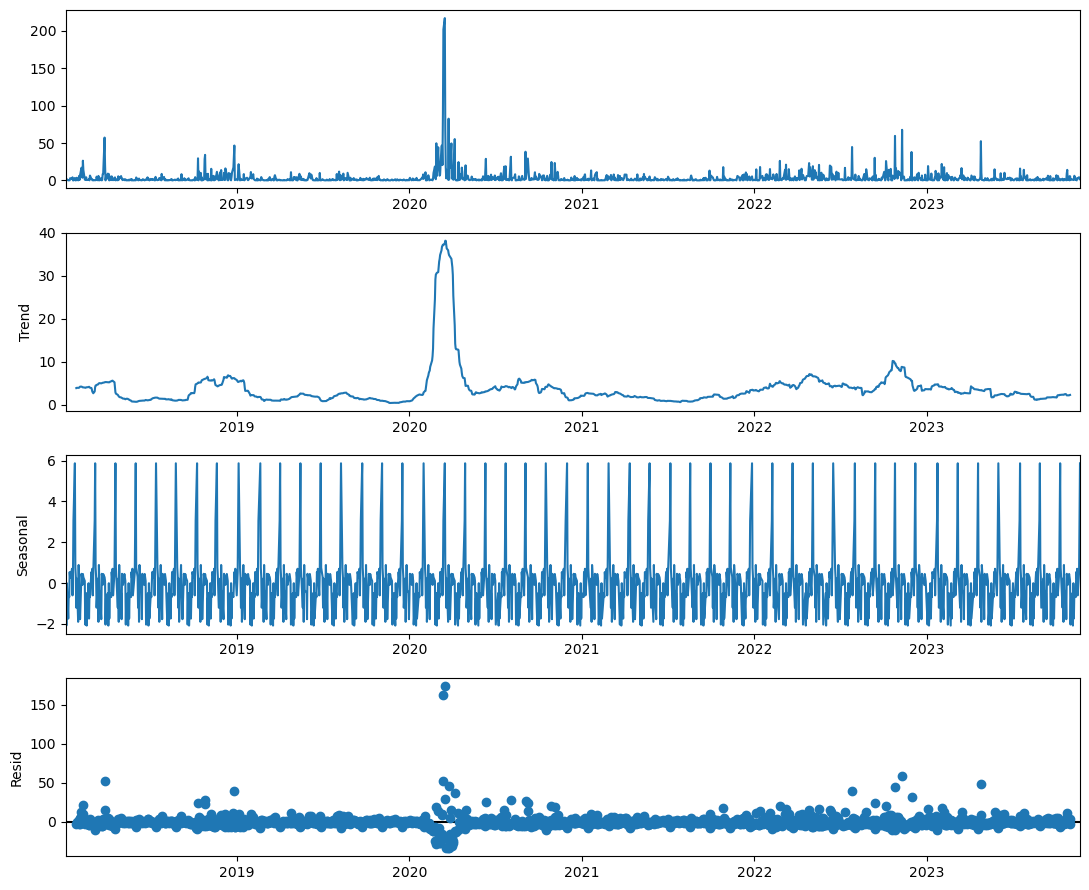

In [13]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

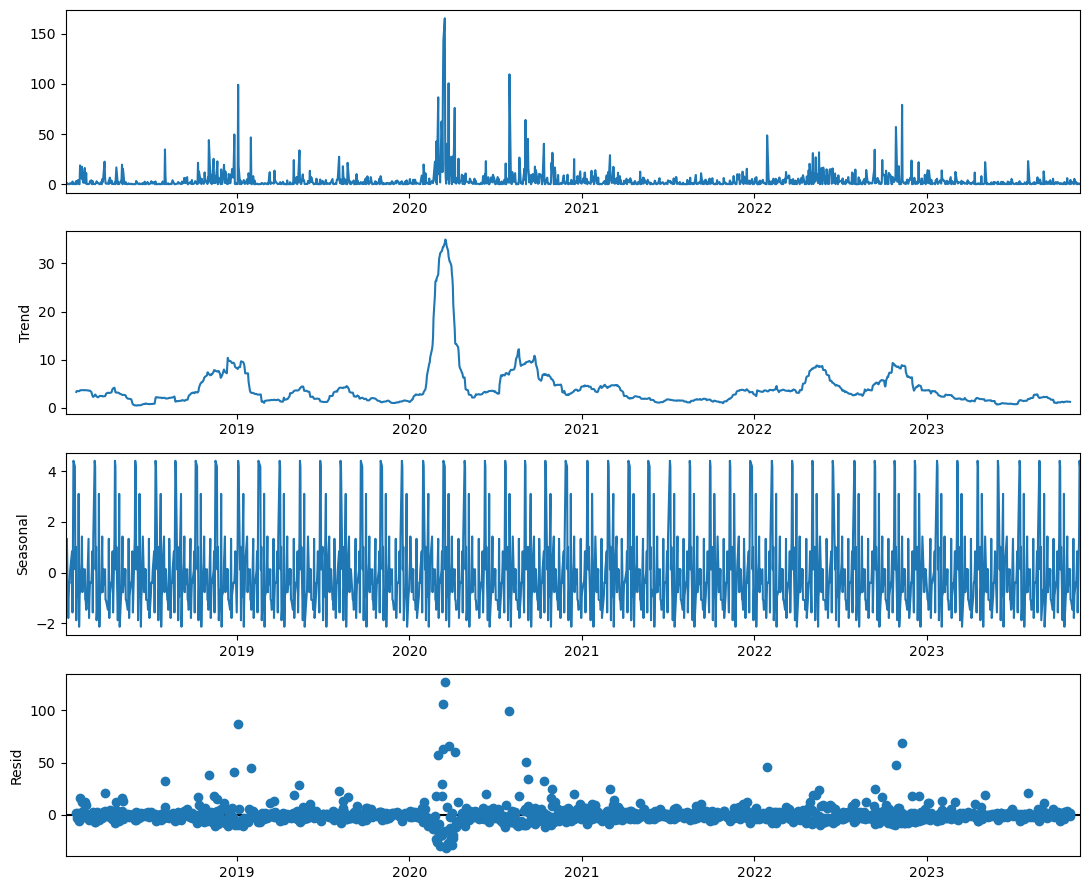

In [14]:
# Apple

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(appl_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

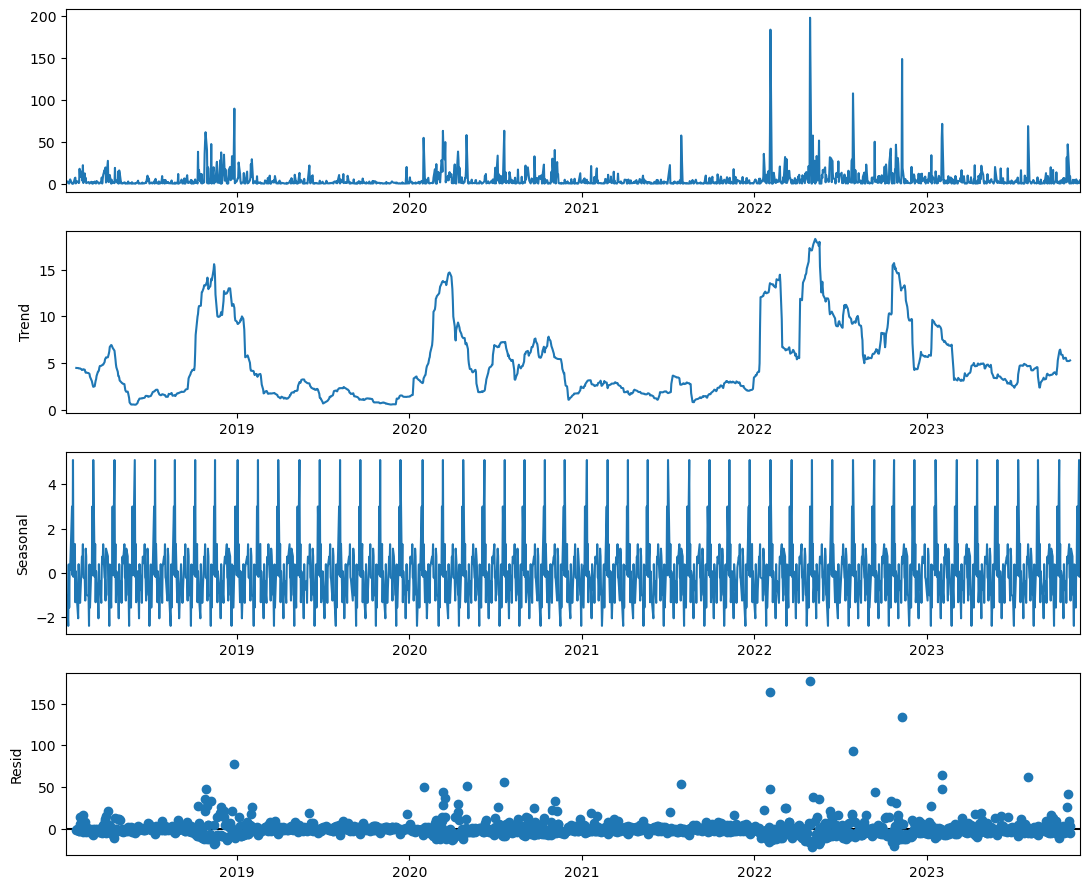

In [15]:
#Amazon

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(amzn_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### Correlations

Text(0.5, 1.0, 'Correlation of stock close price')

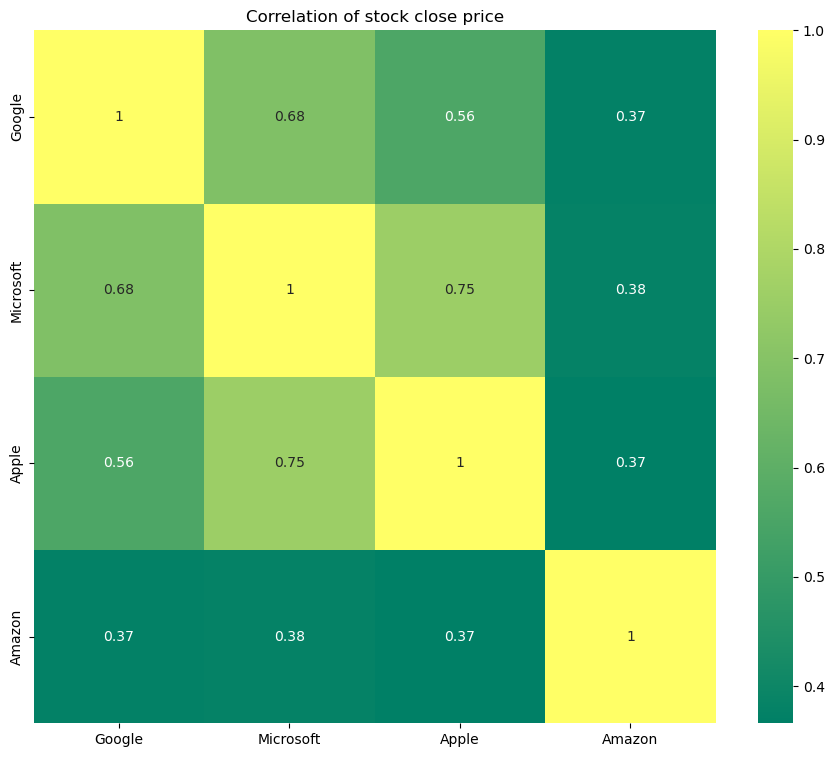

In [16]:
import seaborn as sns
plt.figure()
sns.heatmap(df_all.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock close price')

## Stationarity Check

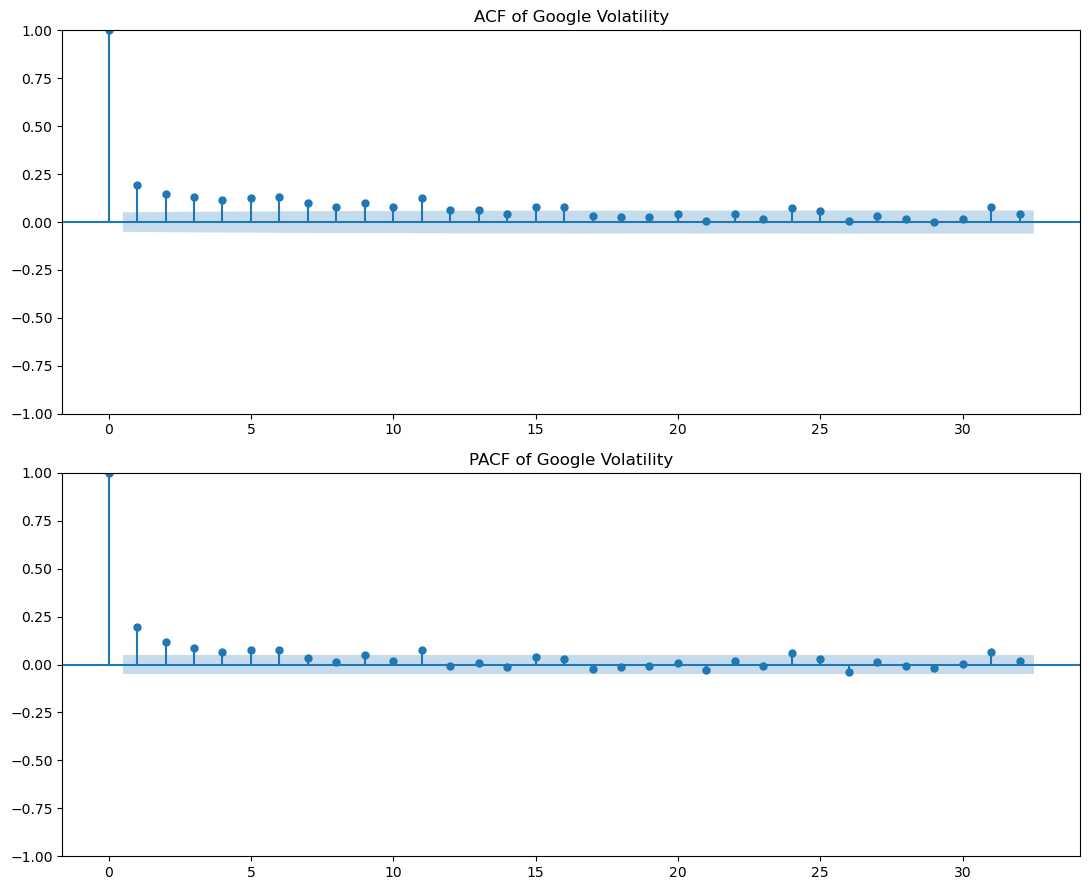

In [17]:
fig, axs = plt.subplots(2)

plot_acf(g_vol, ax=axs[0])
axs[0].set_title('ACF of Google Volatility')
plot_pacf(g_vol, ax=axs[1])
axs[1].set_title('PACF of Google Volatility')

plt.tight_layout()
plt.show()

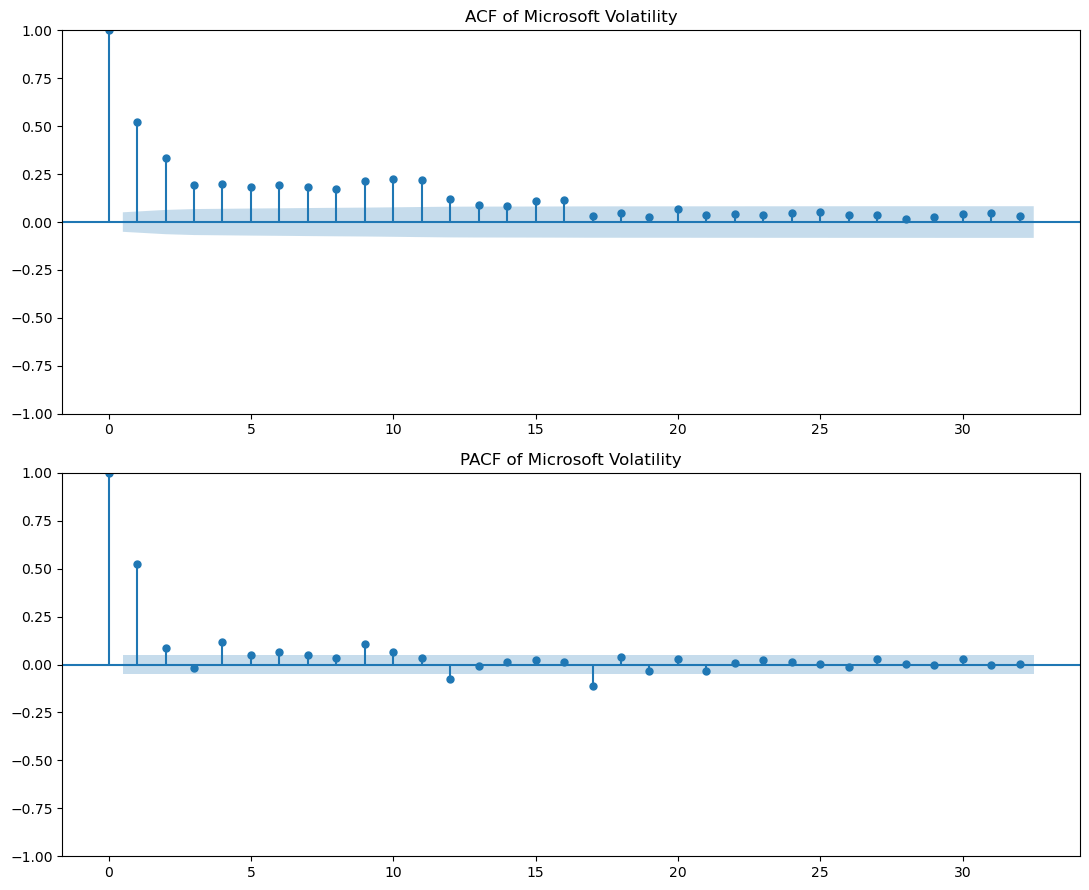

In [18]:
fig, axs = plt.subplots(2)

plot_acf(ms_vol, ax=axs[0])
axs[0].set_title('ACF of Microsoft Volatility')
plot_pacf(ms_vol, ax=axs[1])
axs[1].set_title('PACF of Microsoft Volatility')

plt.tight_layout()
plt.show()

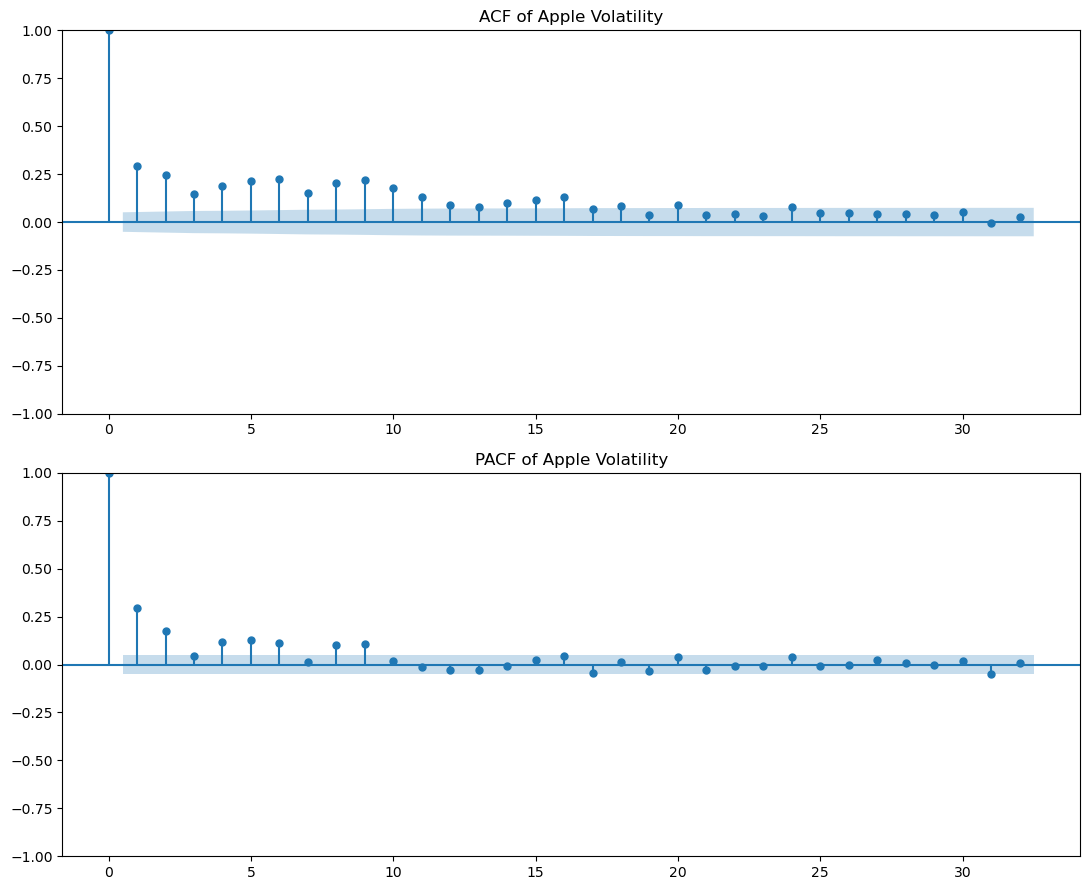

In [19]:
fig, axs = plt.subplots(2)

plot_acf(appl_vol, ax=axs[0])
axs[0].set_title('ACF of Apple Volatility')
plot_pacf(appl_vol, ax=axs[1])
axs[1].set_title('PACF of Apple Volatility')

plt.tight_layout()
plt.show()

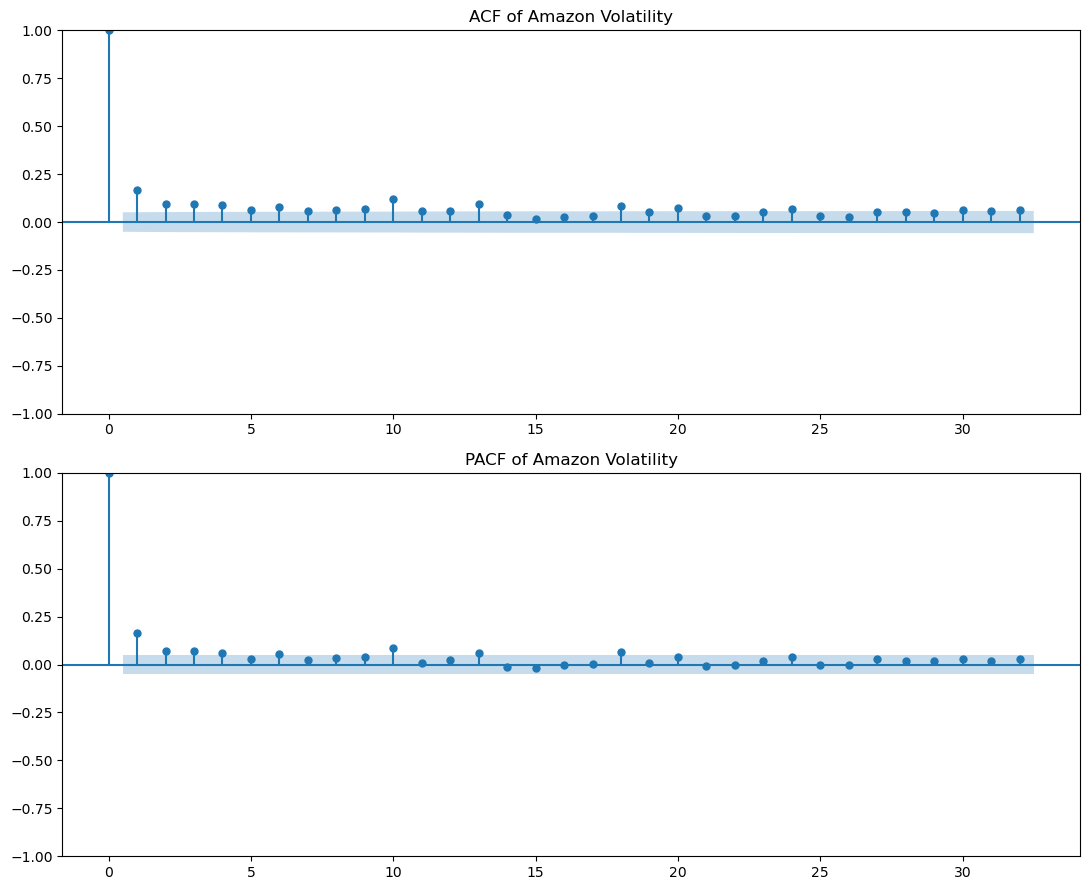

In [20]:
fig, axs = plt.subplots(2)

plot_acf(amzn_vol, ax=axs[0])
axs[0].set_title('ACF of Amazon Volatility')
plot_pacf(amzn_vol, ax=axs[1])
axs[1].set_title('PACF of Amazon Volatility')

plt.tight_layout()
plt.show()

### Transform them to stationary

In [21]:
#放在这儿备用，确认没用后删

#g_diff = g_close.diff().dropna()
#ms_diff = ms_close.diff().dropna()
#amzn_diff = amzn_close.diff().dropna()
#appl_diff = appl_close.diff().dropna()

### The Augmented Dickey-Fuller test

In [22]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_vol)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -7.871516e+00
p-value                        4.970557e-12
#Lags Used                     1.000000e+01
Number of Observations Used    1.472000e+03
Critical Value (1%)           -3.434800e+00
Critical Value (5%)           -2.863505e+00
Critical Value (10%)          -2.567816e+00
dtype: float64

In [23]:
from statsmodels.tsa.stattools import adfuller

ms_adftest = adfuller(ms_vol)
ms_adf_results= pd.Series(ms_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ms_adftest[4].items():
    ms_adf_results['Critical Value (%s)'%key] = value
ms_adf_results

Test Statistic                -7.136787e+00
p-value                        3.404694e-10
#Lags Used                     1.600000e+01
Number of Observations Used    1.466000e+03
Critical Value (1%)           -3.434818e+00
Critical Value (5%)           -2.863514e+00
Critical Value (10%)          -2.567821e+00
dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller

amzn_adftest = adfuller(amzn_vol)
amzn_adf_results= pd.Series(amzn_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in amzn_adftest[4].items():
    amzn_adf_results['Critical Value (%s)'%key] = value
amzn_adf_results

Test Statistic                -7.485335e+00
p-value                        4.655210e-11
#Lags Used                     1.200000e+01
Number of Observations Used    1.470000e+03
Critical Value (1%)           -3.434806e+00
Critical Value (5%)           -2.863508e+00
Critical Value (10%)          -2.567818e+00
dtype: float64

In [25]:
appl_adftest = adfuller(appl_vol)
appl_adf_results= pd.Series(appl_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in appl_adftest[4].items():
    appl_adf_results['Critical Value (%s)'%key] = value
appl_adf_results

Test Statistic                -7.076034e+00
p-value                        4.799426e-10
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [26]:
# Reject all H0, unit root doesn't exists. All stationary(trend-stationary).

# 3. Fit VAR model

In [27]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(df_all))
train, test = df_all[0:-nobs], df_all[-nobs:]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1335 entries, 2018-01-03 00:00:00-05:00 to 2023-04-24 00:00:00-04:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1335 non-null   float64
 1   Microsoft  1335 non-null   float64
 2   Apple      1335 non-null   float64
 3   Amazon     1335 non-null   float64
dtypes: float64(4)
memory usage: 52.1 KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2023-04-25 00:00:00-04:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
 2   Apple      148 non-null    float64
 3   Amazon     148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [30]:
model = VAR(df_all)
aic=[]
for i in range(30):
    result = model.fit(i)
    aic.append(result.aic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  17.20437399001756
BIC :  17.218674252572217
FPE :  29632254.077921305
HQIC:  17.209704395697454 

Lag Order = 1
AIC :  16.85162939174204
BIC :  16.923169847961418
FPE :  20824265.892821968
HQIC:  16.87829691048626 

Lag Order = 2
AIC :  16.807538151610146
BIC :  16.936381515089984
FPE :  19926055.404138654
HQIC:  16.85556760217713 

Lag Order = 3
AIC :  16.811546324606127
BIC :  16.997755421276008
FPE :  20006106.940226737
HQIC:  16.880962571456287 

Lag Order = 4
AIC :  16.798336656325354
BIC :  17.04197442472585
FPE :  19743615.006581027
HQIC:  16.889164609735758 

Lag Order = 5
AIC :  16.775623447879166
BIC :  17.076752939439846
FPE :  19300298.06970614
HQIC:  16.887888064058536 

Lag Order = 6
AIC :  16.769473452992077
BIC :  17.128157832310382
FPE :  19182066.933726154
HQIC:  16.903199734196185 

Lag Order = 7
AIC :  16.784838609315067
BIC :  17.201141154436073
FPE :  19479220.494695824
HQIC:  16.940051603962488 

Lag Order = 8
AIC :  16.795398318137646
BIC : 

In [31]:
aic.sort()
aic

[16.769473452992077,
 16.775623447879166,
 16.784838609315067,
 16.784892911649585,
 16.786856953186753,
 16.791815237980032,
 16.795398318137646,
 16.798336656325354,
 16.806008749484743,
 16.807538151610146,
 16.811546324606127,
 16.81232170391128,
 16.826920250729778,
 16.840898811563477,
 16.85162939174204,
 16.856477652802376,
 16.863877016876682,
 16.879526166792495,
 16.895453238489544,
 16.904171685927956,
 16.919245625417297,
 16.931285651374527,
 16.93796342332107,
 16.95082372620892,
 16.957171916512856,
 16.964957209928134,
 16.98099349761553,
 16.99652122820758,
 17.006365550291807,
 17.20437399001756]

In [32]:
# lag=6时有最小的AIC

In [33]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 1.

model = VAR(train)
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Dec, 2023
Time:                     22:26:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    17.2714
Nobs:                     1329.00    HQIC:                   17.0272
Log likelihood:          -18660.3    FPE:                2.14395e+07
AIC:                      16.8807    Det(Omega_mle):     1.98994e+07
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                1.884585         0.344339            5.473           0.000
L1.Google           -0.020723         0.038044           -0.545           0.586
L1.Microsoft         0.213539         0.045945            4.648

## Granger Casuality Check

In [34]:
# As the data is stationary, so we can now conduct Granger Casuality Check

In [35]:
from statsmodels.tsa.stattools import grangercausalitytests

In [36]:
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            print(f"\nGranger Causality test for {df_all.columns[j]} caused by {df_all.columns[i]}:")
            grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30)



Granger Causality test for Microsoft caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8923  , p=0.1692  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=1.8961  , p=0.1685  , df=1
likelihood ratio test: chi2=1.8949  , p=0.1686  , df=1
parameter F test:         F=1.8923  , p=0.1692  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2431  , p=0.0145  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=8.5149  , p=0.0142  , df=2
likelihood ratio test: chi2=8.4905  , p=0.0143  , df=2
parameter F test:         F=4.2431  , p=0.0145  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.8708  , p=0.0006  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=17.6962 , p=0.0005  , df=3
likelihood ratio test: chi2=17.5912 , p=0.0005  , df=3
parameter F test:         F=5.8708  , p=0.0006  , df_denom=1473, df_num=3

Granger Causality
number of lag

ssr based F test:         F=1.7217  , p=0.0112  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=50.1721 , p=0.0062  , df=28
likelihood ratio test: chi2=49.3265 , p=0.0077  , df=28
parameter F test:         F=1.7217  , p=0.0112  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.6655  , p=0.0149  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=50.3421 , p=0.0083  , df=29
likelihood ratio test: chi2=49.4902 , p=0.0102  , df=29
parameter F test:         F=1.6655  , p=0.0149  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.5946  , p=0.0222  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=49.9339 , p=0.0126  , df=30
likelihood ratio test: chi2=49.0951 , p=0.0154  , df=30
parameter F test:         F=1.5946  , p=0.0222  , df_denom=1392, df_num=30

Granger Causality test for Apple caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:     

ssr based F test:         F=1.5296  , p=0.0360  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=46.2349 , p=0.0222  , df=29
likelihood ratio test: chi2=45.5150 , p=0.0262  , df=29
parameter F test:         F=1.5296  , p=0.0360  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.5211  , p=0.0358  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=47.6319 , p=0.0216  , df=30
likelihood ratio test: chi2=46.8678 , p=0.0256  , df=30
parameter F test:         F=1.5211  , p=0.0358  , df_denom=1392, df_num=30

Granger Causality test for Amazon caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=21.1665 , p=0.0000  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=21.2094 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0591 , p=0.0000  , df=1
parameter F test:         F=21.1665 , p=0.0000  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         

ssr based F test:         F=28.6067 , p=0.0000  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=57.4072 , p=0.0000  , df=2
likelihood ratio test: chi2=56.3225 , p=0.0000  , df=2
parameter F test:         F=28.6067 , p=0.0000  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=17.0877 , p=0.0000  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=51.5066 , p=0.0000  , df=3
likelihood ratio test: chi2=50.6306 , p=0.0000  , df=3
parameter F test:         F=17.0877 , p=0.0000  , df_denom=1473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=13.8308 , p=0.0000  , df_denom=1470, df_num=4
ssr based chi2 test:   chi2=55.6618 , p=0.0000  , df=4
likelihood ratio test: chi2=54.6400 , p=0.0000  , df=4
parameter F test:         F=13.8308 , p=0.0000  , df_denom=1470, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=11.2007 , p=0.0000  , df_denom=1467, df_num=5
ssr based chi2

ssr based F test:         F=3.0472  , p=0.0000  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=92.1065 , p=0.0000  , df=29
likelihood ratio test: chi2=89.3068 , p=0.0000  , df=29
parameter F test:         F=3.0472  , p=0.0000  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=3.1297  , p=0.0000  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=98.0063 , p=0.0000  , df=30
likelihood ratio test: chi2=94.8425 , p=0.0000  , df=30
parameter F test:         F=3.1297  , p=0.0000  , df_denom=1392, df_num=30

Granger Causality test for Apple caused by Microsoft:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=55.0320 , p=0.0000  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=55.1436 , p=0.0000  , df=1
likelihood ratio test: chi2=54.1424 , p=0.0000  , df=1
parameter F test:         F=55.0320 , p=0.0000  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:       

ssr based F test:         F=6.6702  , p=0.0000  , df_denom=1461, df_num=7
ssr based chi2 test:   chi2=47.1706 , p=0.0000  , df=7
likelihood ratio test: chi2=46.4325 , p=0.0000  , df=7
parameter F test:         F=6.6702  , p=0.0000  , df_denom=1461, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=5.8240  , p=0.0000  , df_denom=1458, df_num=8
ssr based chi2 test:   chi2=47.1355 , p=0.0000  , df=8
likelihood ratio test: chi2=46.3980 , p=0.0000  , df=8
parameter F test:         F=5.8240  , p=0.0000  , df_denom=1458, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=5.1868  , p=0.0000  , df_denom=1455, df_num=9
ssr based chi2 test:   chi2=47.2906 , p=0.0000  , df=9
likelihood ratio test: chi2=46.5478 , p=0.0000  , df=9
parameter F test:         F=5.1868  , p=0.0000  , df_denom=1455, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6633  , p=0.0000  , df_denom=1452, df_num=10
ssr based ch

ssr based F test:         F=5.6176  , p=0.0000  , df_denom=1455, df_num=9
ssr based chi2 test:   chi2=51.2189 , p=0.0000  , df=9
likelihood ratio test: chi2=50.3491 , p=0.0000  , df=9
parameter F test:         F=5.6176  , p=0.0000  , df_denom=1455, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.3786  , p=0.0000  , df_denom=1452, df_num=10
ssr based chi2 test:   chi2=54.5640 , p=0.0000  , df=10
likelihood ratio test: chi2=53.5777 , p=0.0000  , df=10
parameter F test:         F=5.3786  , p=0.0000  , df_denom=1452, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=4.7640  , p=0.0000  , df_denom=1449, df_num=11
ssr based chi2 test:   chi2=53.2356 , p=0.0000  , df=11
likelihood ratio test: chi2=52.2956 , p=0.0000  , df=11
parameter F test:         F=4.7640  , p=0.0000  , df_denom=1449, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=4.3917  , p=0.0000  , df_denom=1446, df_num=12
ss

parameter F test:         F=3.6316  , p=0.0000  , df_denom=1431, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=3.5005  , p=0.0000  , df_denom=1428, df_num=18
ssr based chi2 test:   chi2=64.6407 , p=0.0000  , df=18
likelihood ratio test: chi2=63.2553 , p=0.0000  , df=18
parameter F test:         F=3.5005  , p=0.0000  , df_denom=1428, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=3.4420  , p=0.0000  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=67.1880 , p=0.0000  , df=19
likelihood ratio test: chi2=65.6919 , p=0.0000  , df=19
parameter F test:         F=3.4420  , p=0.0000  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=3.2734  , p=0.0000  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=67.3546 , p=0.0000  , df=20
likelihood ratio test: chi2=65.8502 , p=0.0000  , df=20
parameter F test:         F=3.2734  , p=0.0000  , df_denom=1422, df_num=2

ssr based F test:         F=1.5277  , p=0.0411  , df_denom=1401, df_num=27
ssr based chi2 test:   chi2=42.8659 , p=0.0270  , df=27
likelihood ratio test: chi2=42.2470 , p=0.0311  , df=27
parameter F test:         F=1.5277  , p=0.0411  , df_denom=1401, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.5022  , p=0.0450  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=43.7776 , p=0.0292  , df=28
likelihood ratio test: chi2=43.1320 , p=0.0338  , df=28
parameter F test:         F=1.5022  , p=0.0450  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.4399  , p=0.0617  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=43.5221 , p=0.0407  , df=29
likelihood ratio test: chi2=42.8834 , p=0.0467  , df=29
parameter F test:         F=1.4399  , p=0.0617  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.4027  , p=0.0734  , df_denom=1392, df_num=3

parameter F test:         F=1.0386  , p=0.3542  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1119  , p=0.0969  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=6.3659  , p=0.0951  , df=3
likelihood ratio test: chi2=6.3522  , p=0.0957  , df=3
parameter F test:         F=2.1119  , p=0.0969  , df_denom=1473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6671  , p=0.1551  , df_denom=1470, df_num=4
ssr based chi2 test:   chi2=6.7092  , p=0.1521  , df=4
likelihood ratio test: chi2=6.6940  , p=0.1530  , df=4
parameter F test:         F=1.6671  , p=0.1551  , df_denom=1470, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1959  , p=0.3088  , df_denom=1467, df_num=5
ssr based chi2 test:   chi2=6.0245  , p=0.3038  , df=5
likelihood ratio test: chi2=6.0122  , p=0.3050  , df=5
parameter F test:         F=1.1959  , p=0.3088  , df_denom=1467, df_num=5

Granger Causa

ssr based F test:         F=1.2090  , p=0.2027  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=37.8608 , p=0.1534  , df=30
likelihood ratio test: chi2=37.3760 , p=0.1664  , df=30
parameter F test:         F=1.2090  , p=0.2027  , df_denom=1392, df_num=30

Granger Causality test for Apple caused by Amazon:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0071  , p=0.9330  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=0.0071  , p=0.9329  , df=1
likelihood ratio test: chi2=0.0071  , p=0.9329  , df=1
parameter F test:         F=0.0071  , p=0.9330  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1127  , p=0.8934  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=0.2262  , p=0.8931  , df=2
likelihood ratio test: chi2=0.2262  , p=0.8931  , df=2
parameter F test:         F=0.1127  , p=0.8934  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.12

In [37]:
results_df = pd.DataFrame(columns=df_all.columns, index=df_all.columns)

for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            
            test_result=grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30, verbose=False)
            
            # Get the p-value of the F-test for the last lag
            p_value = test_result[2][0]['ssr_ftest'][1]
            
            # If the p-value is less than 0.05, we reject the null hypothesis and conclude that
            # the column variable Granger-causes the index variable
            results_df.loc[df_all.columns[j], df_all.columns[i]] = p_value < 0.05

print(results_df)

          Google Microsoft Apple Amazon
Google       NaN      True  True  False
Microsoft   True       NaN  True  False
Apple       True      True   NaN  False
Amazon      True      True  True    NaN


### DW-Test of the residuals

In [38]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 4))


Google : 2.0061
Microsoft : 1.9991
Apple : 2.0033
Amazon : 2.0031


# 4. Forecast

## Simple Forecast

In [39]:
lag_order = model_fitted.k_ar
print(lag_order)

6


In [40]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[7.71323474e+00, 8.64179759e-01, 1.46455188e-04, 5.03392861e-02],
       [1.49223476e+00, 2.21676076e-02, 5.63199294e-01, 1.83407042e-01],
       [9.05070242e-03, 7.69680275e-04, 4.85578920e-01, 3.82215855e+00],
       [7.02143959e-01, 6.58122756e-01, 3.41804995e-01, 2.20715714e-01],
       [8.92059039e-05, 1.49609016e-02, 9.56655715e-01, 9.20753051e+00],
       [6.74776057e-01, 1.94959406e+00, 3.52896022e-02, 4.91676833e-01]])

In [41]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=df_all.index[-nobs:], columns=test.columns )
forecast

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,3.080261,2.041943,2.406690,2.240222
2023-04-26 00:00:00-04:00,2.705760,2.015061,2.725324,3.605522
2023-04-27 00:00:00-04:00,2.294346,1.206763,1.845103,3.957505
2023-04-28 00:00:00-04:00,2.632772,1.747424,2.616778,3.383480
2023-05-01 00:00:00-04:00,2.885344,1.884414,2.313363,4.047427
...,...,...,...,...
2023-11-16 00:00:00-05:00,4.005892,3.816489,4.351343,5.134543
2023-11-17 00:00:00-05:00,4.005892,3.816489,4.351343,5.134543
2023-11-20 00:00:00-05:00,4.005892,3.816489,4.351343,5.134543


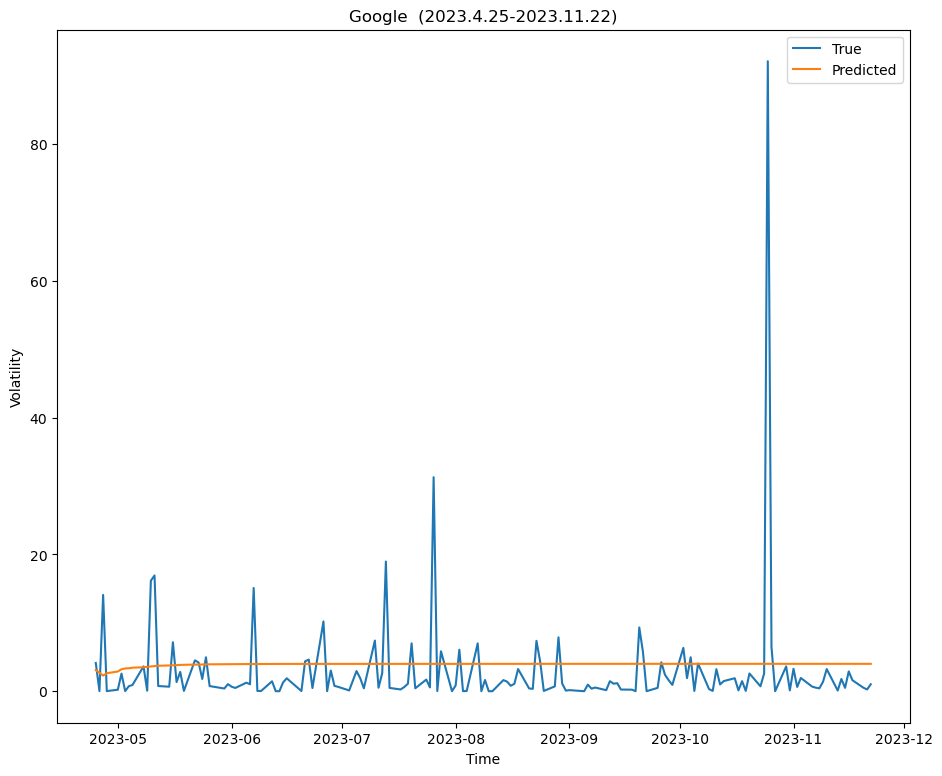

In [42]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

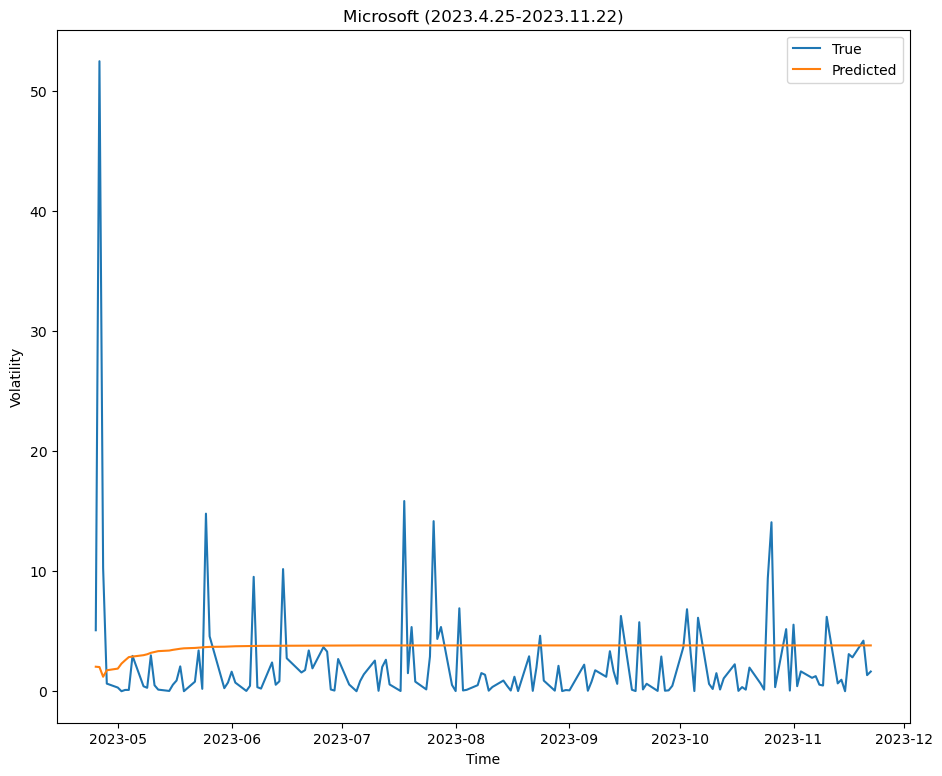

In [43]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

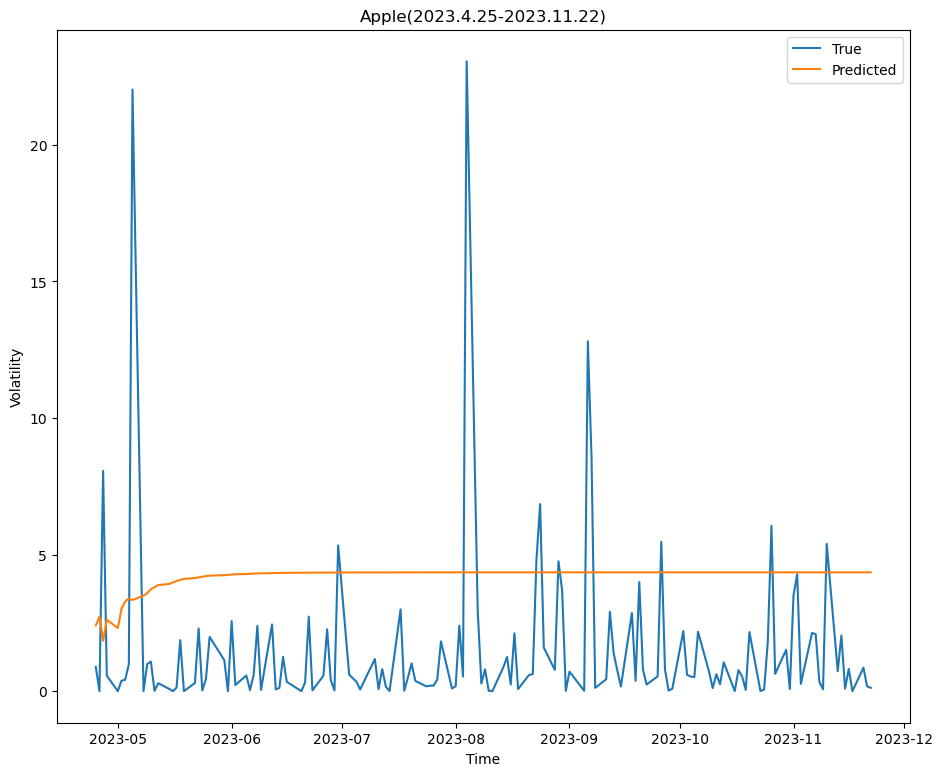

In [44]:
plt.plot(test['Apple'], label='True')
plt.plot(forecast['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Apple(2023.4.25-2023.11.22)')
plt.legend()
plt.show()

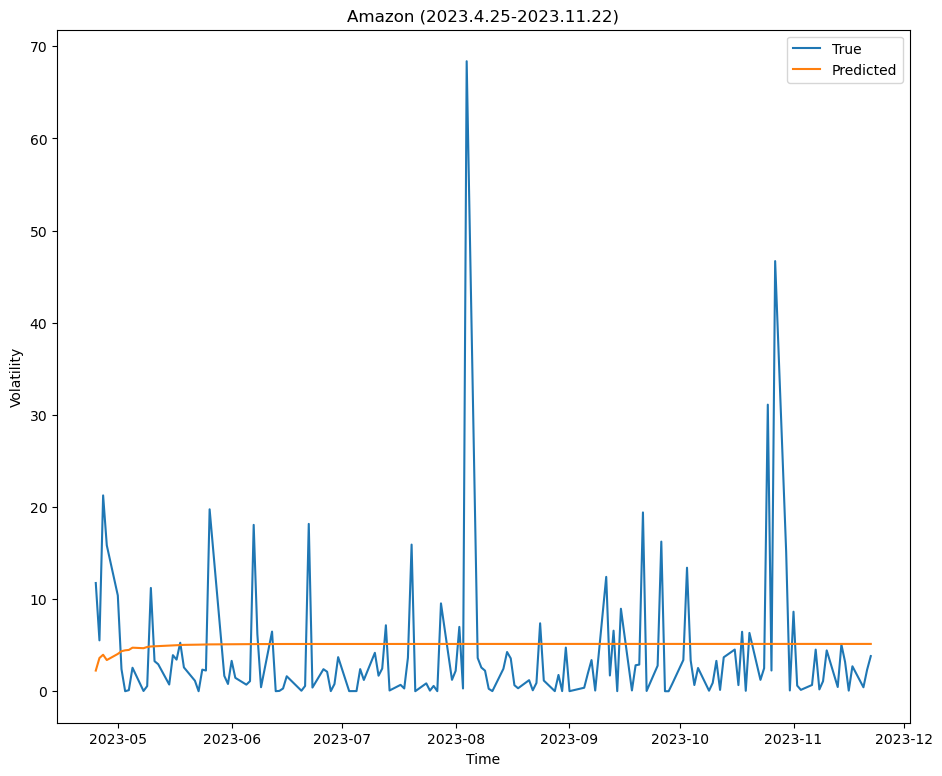

In [45]:
plt.plot(test['Amazon'], label='True')
plt.plot(forecast['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Amazon (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [46]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [47]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  71.9876
rmse :  8.4846

Forecast Accuracy of: Microsoft
mse :  29.1241
rmse :  5.3967


## Rolling Forecast

In [48]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = df_all[:-(test_size-i)]  
    
    forecast_input = train.values[-lag_order:]
    
    model = VAR(train)
    model_fitted = model.fit(lag_order)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=df_all.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [49]:
rolling_predictions.index = test.index
rolling_predictions

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,3.080261,2.041943,2.406690,2.240222
2023-04-26 00:00:00-04:00,3.173844,2.609926,2.981303,4.720694
2023-04-27 00:00:00-04:00,12.969169,23.069339,13.465822,4.865744
2023-04-28 00:00:00-04:00,0.807378,2.276663,2.886264,9.971825
2023-05-01 00:00:00-04:00,-5.897794,-10.950747,-8.420426,-0.994102
...,...,...,...,...
2023-11-16 00:00:00-05:00,2.521633,1.453652,1.912250,3.213045
2023-11-17 00:00:00-05:00,3.338696,2.513610,3.157188,3.377859
2023-11-20 00:00:00-05:00,3.088244,2.305293,3.161797,4.357883


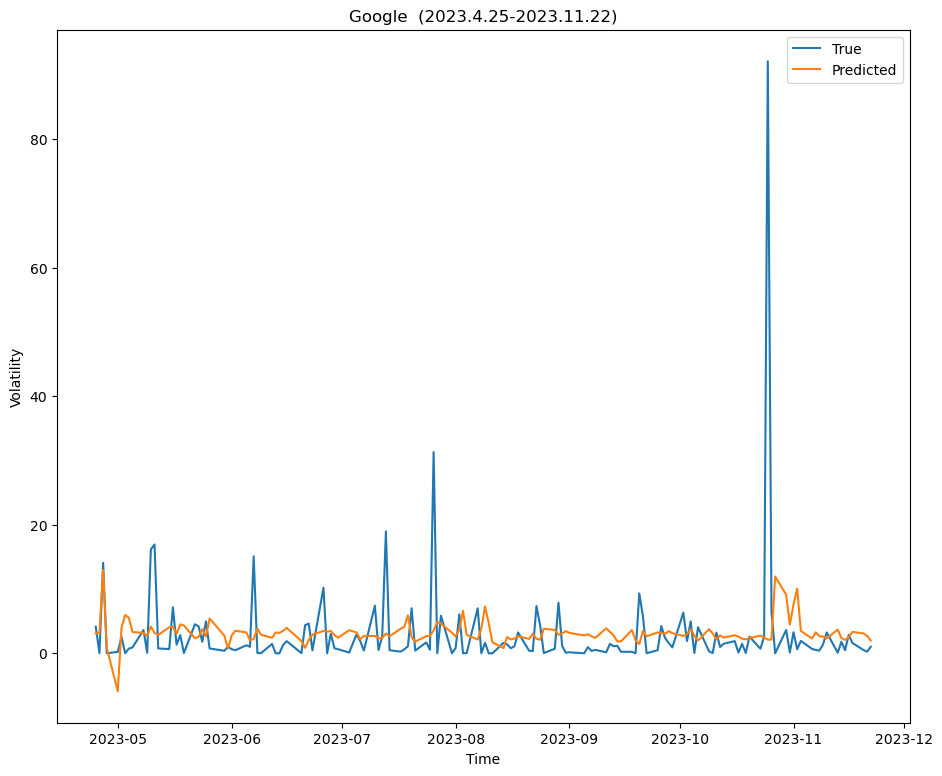

In [50]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

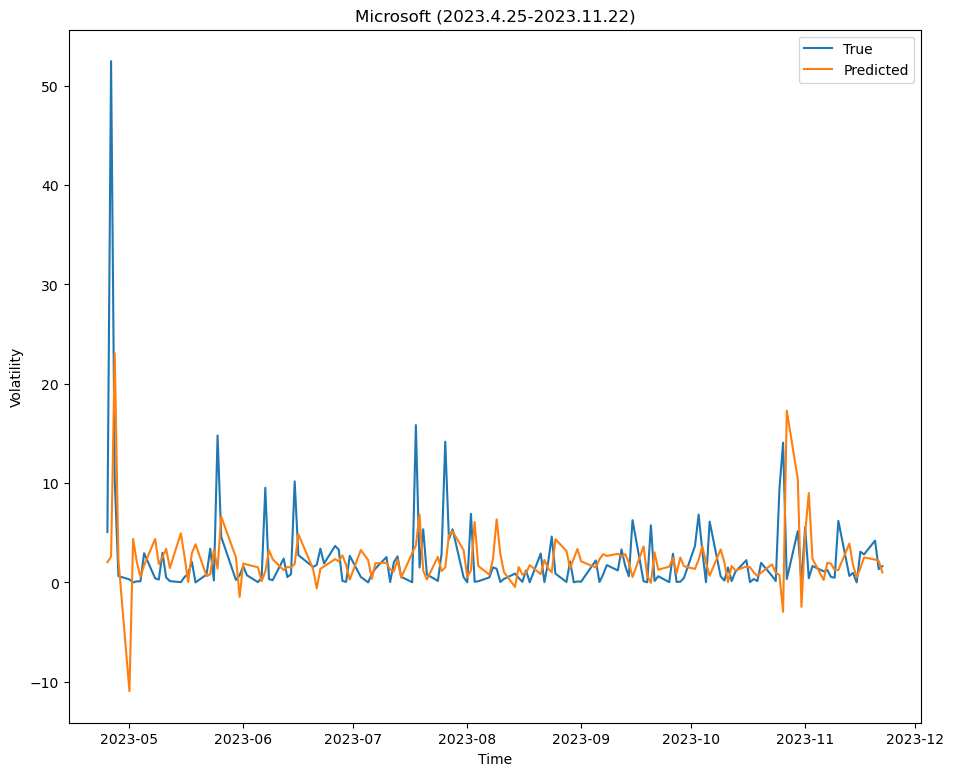

In [51]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

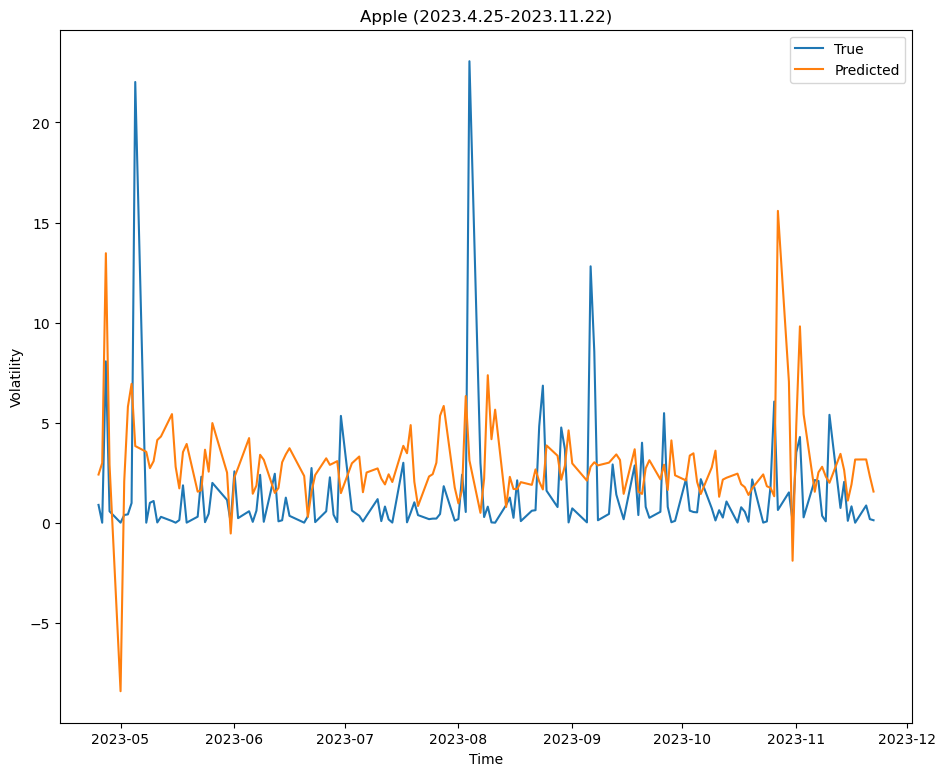

In [52]:
plt.plot(test['Apple'], label='True')
plt.plot(rolling_predictions['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Apple (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

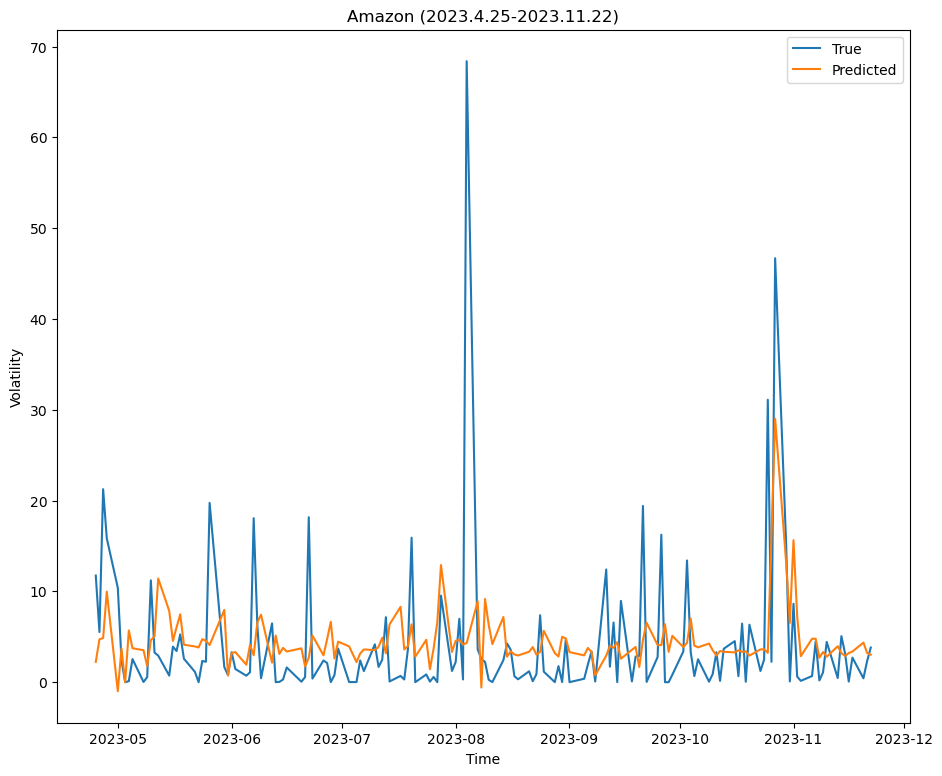

In [53]:
plt.plot(test['Amazon'], label='True')
plt.plot(rolling_predictions['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Amazon (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [58]:
# 这个最好放到ppt上

df_all.describe()

,Google,Microsoft,Apple,Amazon
count,1483.000000,1483.000000,1483.000000,1483.000000
mean,3.898842,3.661597,4.050402,5.031983
std,9.336431,10.575514,10.537991,12.113748
min,0.000003,0.000000,0.000000,0.000000
25%,0.193139,0.191370,0.206298,0.266660
50%,0.979583,1.001261,1.019569,1.317544
75%,3.673367,3.454098,3.715244,4.674764
max,123.228164,217.238630,165.500693,197.386702


## Evaluation

In [54]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
    

Rolling Forecast Accuracy of: Google
mse :  74.5274
rmse :  8.6329

 Rolling Forecast Accuracy of: Microsoft
mse :  32.8659
rmse :  5.7329

 Rolling Forecast Accuracy of: Apple
mse :  14.8299
rmse :  3.851

 Rolling Forecast Accuracy of: Amazon
mse :  60.0517
rmse :  7.7493


In [63]:
from sklearn.metrics import mean_absolute_error, r2_score

def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((forecast - actual) / actual)) * 100
    smape = np.mean(2.0 * np.abs(actual - forecast) / ((np.abs(actual) + np.abs(forecast)) + 1e-10)) * 100
    r2 = r2_score(actual, forecast)
    rse = np.sum((actual - forecast)**2) / np.sum((actual - np.mean(actual))**2)


    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape, 'smape': smape, 'r2': r2, 'rse': rse}

In [64]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Rolling Forecast Accuracy of: Google
mse :  74.5274
rmse :  8.6329
mae :  3.6545
mape :  16196.5268
smape :  114.9909
r2 :  -0.0487
rse :  1.0487

 Rolling Forecast Accuracy of: Microsoft
mse :  32.8659
rmse :  5.7329
mae :  2.9022
mape :  4281.0938
smape :  118.8892
r2 :  -0.2576
rse :  1.2576

 Rolling Forecast Accuracy of: Apple
mse :  14.8299
rmse :  3.851
mae :  2.7286
mape :  inf
smape :  127.2738
r2 :  -0.5549
rse :  1.5549

 Rolling Forecast Accuracy of: Amazon
mse :  60.0517
rmse :  7.7493
mae :  4.4164
mape :  inf
smape :  109.0679
r2 :  0.0982
rse :  0.9018


### 把sMAPE摘出来看地更清晰

In [65]:
def smape(actual, forecast):
    smape = np.mean(2.0 * np.abs(actual - forecast) / ((np.abs(actual) + np.abs(forecast)) + 1e-10)) * 100
    return{'sMAPE': smape}

In [66]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = smape(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = smape(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = smape(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = smape(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Rolling Forecast Accuracy of: Google
sMAPE :  114.9909

 Rolling Forecast Accuracy of: Microsoft
sMAPE :  118.8892

 Rolling Forecast Accuracy of: Apple
sMAPE :  127.2738

 Rolling Forecast Accuracy of: Amazon
sMAPE :  109.0679
